<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Assignment 8</div>
<div style="text-align: right">001305974 Hemant Jain && 001306812 Neeraj Premani , 06 November 2019</div>

# Find an interesting dataset where a single (independent) column has a much stronger **distance correlation** (DC) with the (dependent) column you want to model than all other possible independent columns. Then, use `scikit-learn` to run a regression forest based on that single independent column and predict a range of missing datapoints. Then do the same prediction with all possible independent columns. Then, model the dependent variable with `scikit-learn`'s GP and draw a smooth interpolation with the same range of missing datapoints. Which of the 3 methods yield better predictions?

Bonus points
Repeat with `PyMC3` instead of `scikit-learn`.

 

Work in teams of 2.

# The dataset: 

***Predicting the  Abalone Rings***

Abalone is a mollusc with a peculiar ear-shaped shell lined of mother of pearl. Its age can be estimated counting the number of rings in their shell with a microscope, but it is a time consuming process, in this tutorial we will use Machine Learning to predict the age using physical measurements.
Picture of the shell of an Abalone:






# 1.Distance Correlations

Importing the Required Libraries

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline
#pyplot.style.use('ggplot')
import pandas as pd
import seaborn as sns

Relationship between the dependent and independent variable we found on Internet.
$$Y = 3.2252 + 8.9982 * \text{Length} + 22.5943 * \text{Height} - 3.8011 * \text{Viscera_weight} -1.2741 * \text{GenderI}- 0.1723 * \text{GenderM}$$

The authors then add a bit of noise, and attempt a linear regression using all predictor variables.

In [3]:
data = pd.read_csv("data/abalone.csv")
data

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0       1   0.455     0.365   0.095        0.5140          0.2245   
1       1   0.350     0.265   0.090        0.2255          0.0995   
2       2   0.530     0.420   0.135        0.6770          0.2565   
3       1   0.440     0.365   0.125        0.5160          0.2155   
4       3   0.330     0.255   0.080        0.2050          0.0895   
5       3   0.425     0.300   0.095        0.3515          0.1410   
6       2   0.530     0.415   0.150        0.7775          0.2370   
7       2   0.545     0.425   0.125        0.7680          0.2940   
8       1   0.475     0.370   0.125        0.5095          0.2165   
9       2   0.550     0.440   0.150        0.8945          0.3145   
10      2   0.525     0.380   0.140        0.6065          0.1940   
11      1   0.430     0.350   0.110        0.4060          0.1675   
12      1   0.490     0.380   0.135        0.5415          0.2175   
13      2   0.535     0.405   0.145        0.6845          0.2725   
14      2   0.470     0.355   0.100        0.4755          0.1675   
15      1   0.500     0.400   0.130        0.6645          0.2580   
16      3   0.355     0.280   0.085        0.2905          0.0950   
17      2   0.440     0.340   0.100        0.4510          0.1880   
18      1   0.365     0.295   0.080        0.2555          0.0970   
19      1   0.450     0.320   0.100        0.3810          0.1705   
20      1   0.355     0.280   0.095        0.2455          0.0955   
21      3   0.380     0.275   0.100        0.2255          0.0800   
22      2   0.565     0.440   0.155        0.9395          0.4275   
23      2   0.550     0.415   0.135        0.7635          0.3180   
24      2   0.615     0.480   0.165        1.1615          0.5130   
25      2   0.560     0.440   0.140        0.9285          0.3825   
26      2   0.580     0.450   0.185        0.9955          0.3945   
27      1   0.590     0.445   0.140        0.9310          0.3560   
28      1   0.605     0.475   0.180        0.9365          0.3940   
29      1   0.575     0.425   0.140        0.8635          0.3930   
...   ...     ...       ...     ...           ...             ...   
4147    1   0.695     0.550   0.195        1.6645          0.7270   
4148    1   0.770     0.605   0.175        2.0505          0.8005   
4149    3   0.280     0.215   0.070        0.1240          0.0630   
4150    3   0.330     0.230   0.080        0.1400          0.0565   
4151    3   0.350     0.250   0.075        0.1695          0.0835   
4152    3   0.370     0.280   0.090        0.2180          0.0995   
4153    3   0.430     0.315   0.115        0.3840          0.1885   
4154    3   0.435     0.330   0.095        0.3930          0.2190   
4155    3   0.440     0.350   0.110        0.3805          0.1575   
4156    1   0.475     0.370   0.110        0.4895          0.2185   
4157    1   0.475     0.360   0.140        0.5135          0.2410   
4158    3   0.480     0.355   0.110        0.4495          0.2010   
4159    2   0.560     0.440   0.135        0.8025          0.3500   
4160    2   0.585     0.475   0.165        1.0530          0.4580   
4161    2   0.585     0.455   0.170        0.9945          0.4255   
4162    1   0.385     0.255   0.100        0.3175          0.1370   
4163    3   0.390     0.310   0.085        0.3440          0.1810   
4164    3   0.390     0.290   0.100        0.2845          0.1255   
4165    3   0.405     0.300   0.085        0.3035          0.1500   
4166    3   0.475     0.365   0.115        0.4990          0.2320   
4167    1   0.500     0.380   0.125        0.5770          0.2690   
4168    2   0.515     0.400   0.125        0.6150          0.2865   
4169    1   0.520     0.385   0.165        0.7910          0.3750   
4170    1   0.550     0.430   0.130        0.8395          0.3155   
4171    1   0.560     0.430   0.155        0.8675          0.4000   
4172    2   0.565     0.450   0.165        0.8870          0.3700   
4173

We do the same with Bayesian estimation, patsy-style:

In [4]:
import dcor
for a in data.keys():
    print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Rings'], 
                                                                        data[a])))

distance correlation = 0.41
distance correlation = 0.58
distance correlation = 0.59
distance correlation = 0.61
distance correlation = 0.57
distance correlation = 0.49
distance correlation = 0.56
distance correlation = 0.63
distance correlation = 1.00


In [5]:
#Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
import pymc3 as pm
with pm.Model() as glm_model:
    pm.glm.GLM.from_formula('Rings ~ Sex+Length+Diameter+Height+Whole_weight+ Shucked_weight+ Viscera_weight +Shell_weight',
                            data,
                            family=pm.glm.families.Normal())
    trace2 = pm.sample(1000, tune=1000, init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, Shell_weight, Viscera_weight, Shucked_weight, Whole_weight, Height, Diameter, Length, Sex, Intercept]
Sampling 2 chains: 100%|██████████| 4000/4000 [02:37<00:00, 25.43draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C520173EB8>,
      dtype=object)

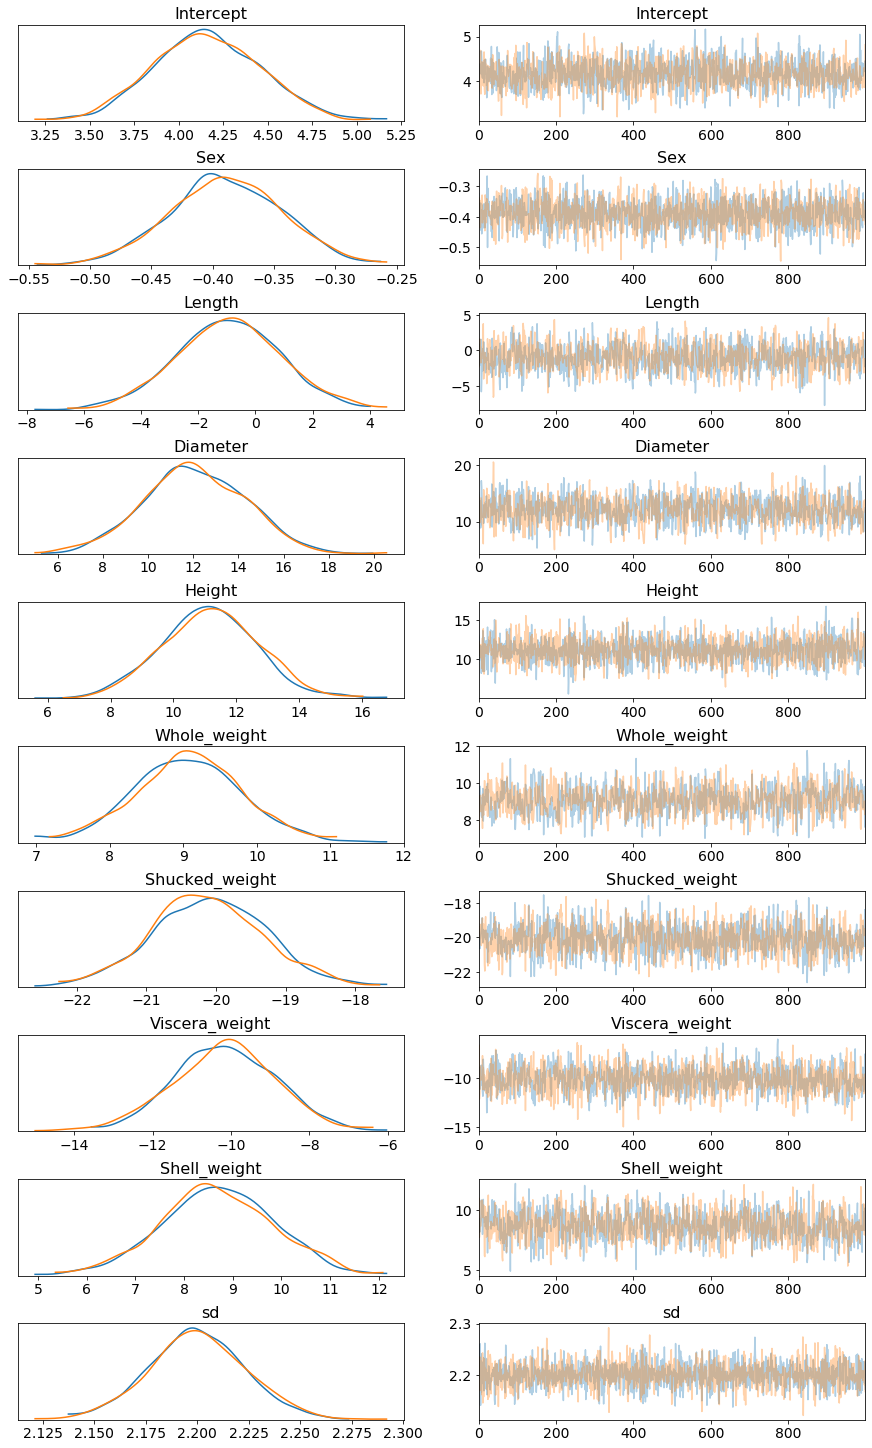

In [6]:
pm.traceplot(trace2)

C:\Users\JAINHEMANT\Anaconda3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C524A08710>,
      dtype=object)

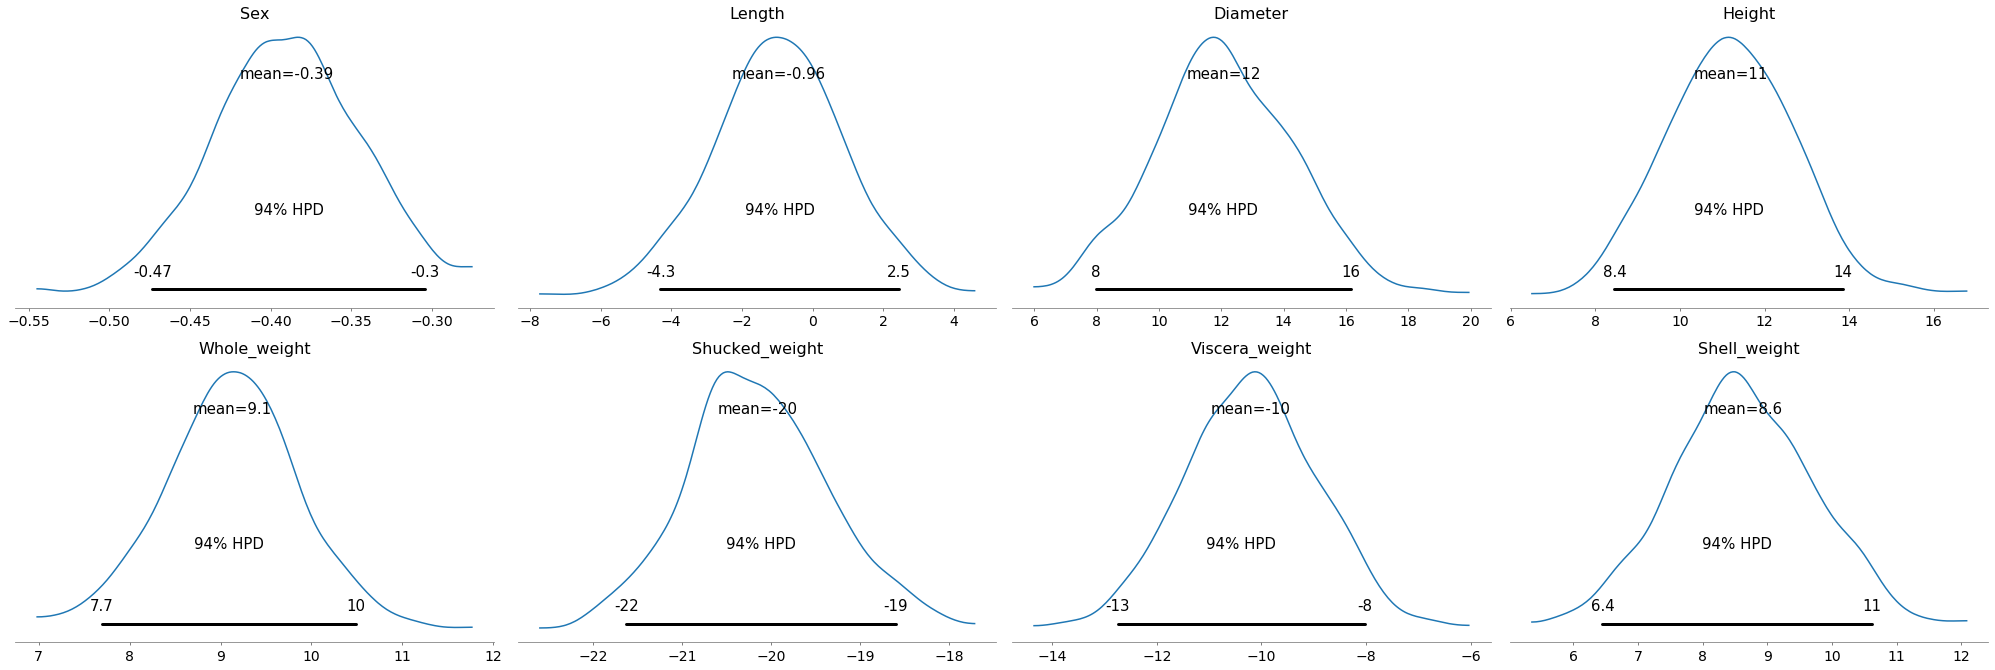

In [7]:
pm.plot_posterior(trace2[500:], varnames=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight'])

Our analysis yields the following relationship between the data: 

$$Y = 3.2252 + 8.9982 * \text{Length} + 22.5943 * \text{Height} - 3.8011 * \text{Viscera_weight} -1.2741 * \text{GenderI}- 0.1723 * \text{GenderM}$$

The article authors find:


$$Y = 3.2252 + 8.9982 * \text{Length} + 22.5943 * \text{Height} - 3.8011 * \text{Viscera_weight} -1.2741 * \text{GenderI}- 0.1723 * \text{GenderM}$$

Pretty close! But the authors state that *(...) the weights are not quite correct*.

***What can we do to get better estimates?***

Let's do some EDA. The scatter matrix below includes bivariate scatter-plots in the upper triangle, contours in the lower triangle, shape of the bivariate distributions on the diagonal.

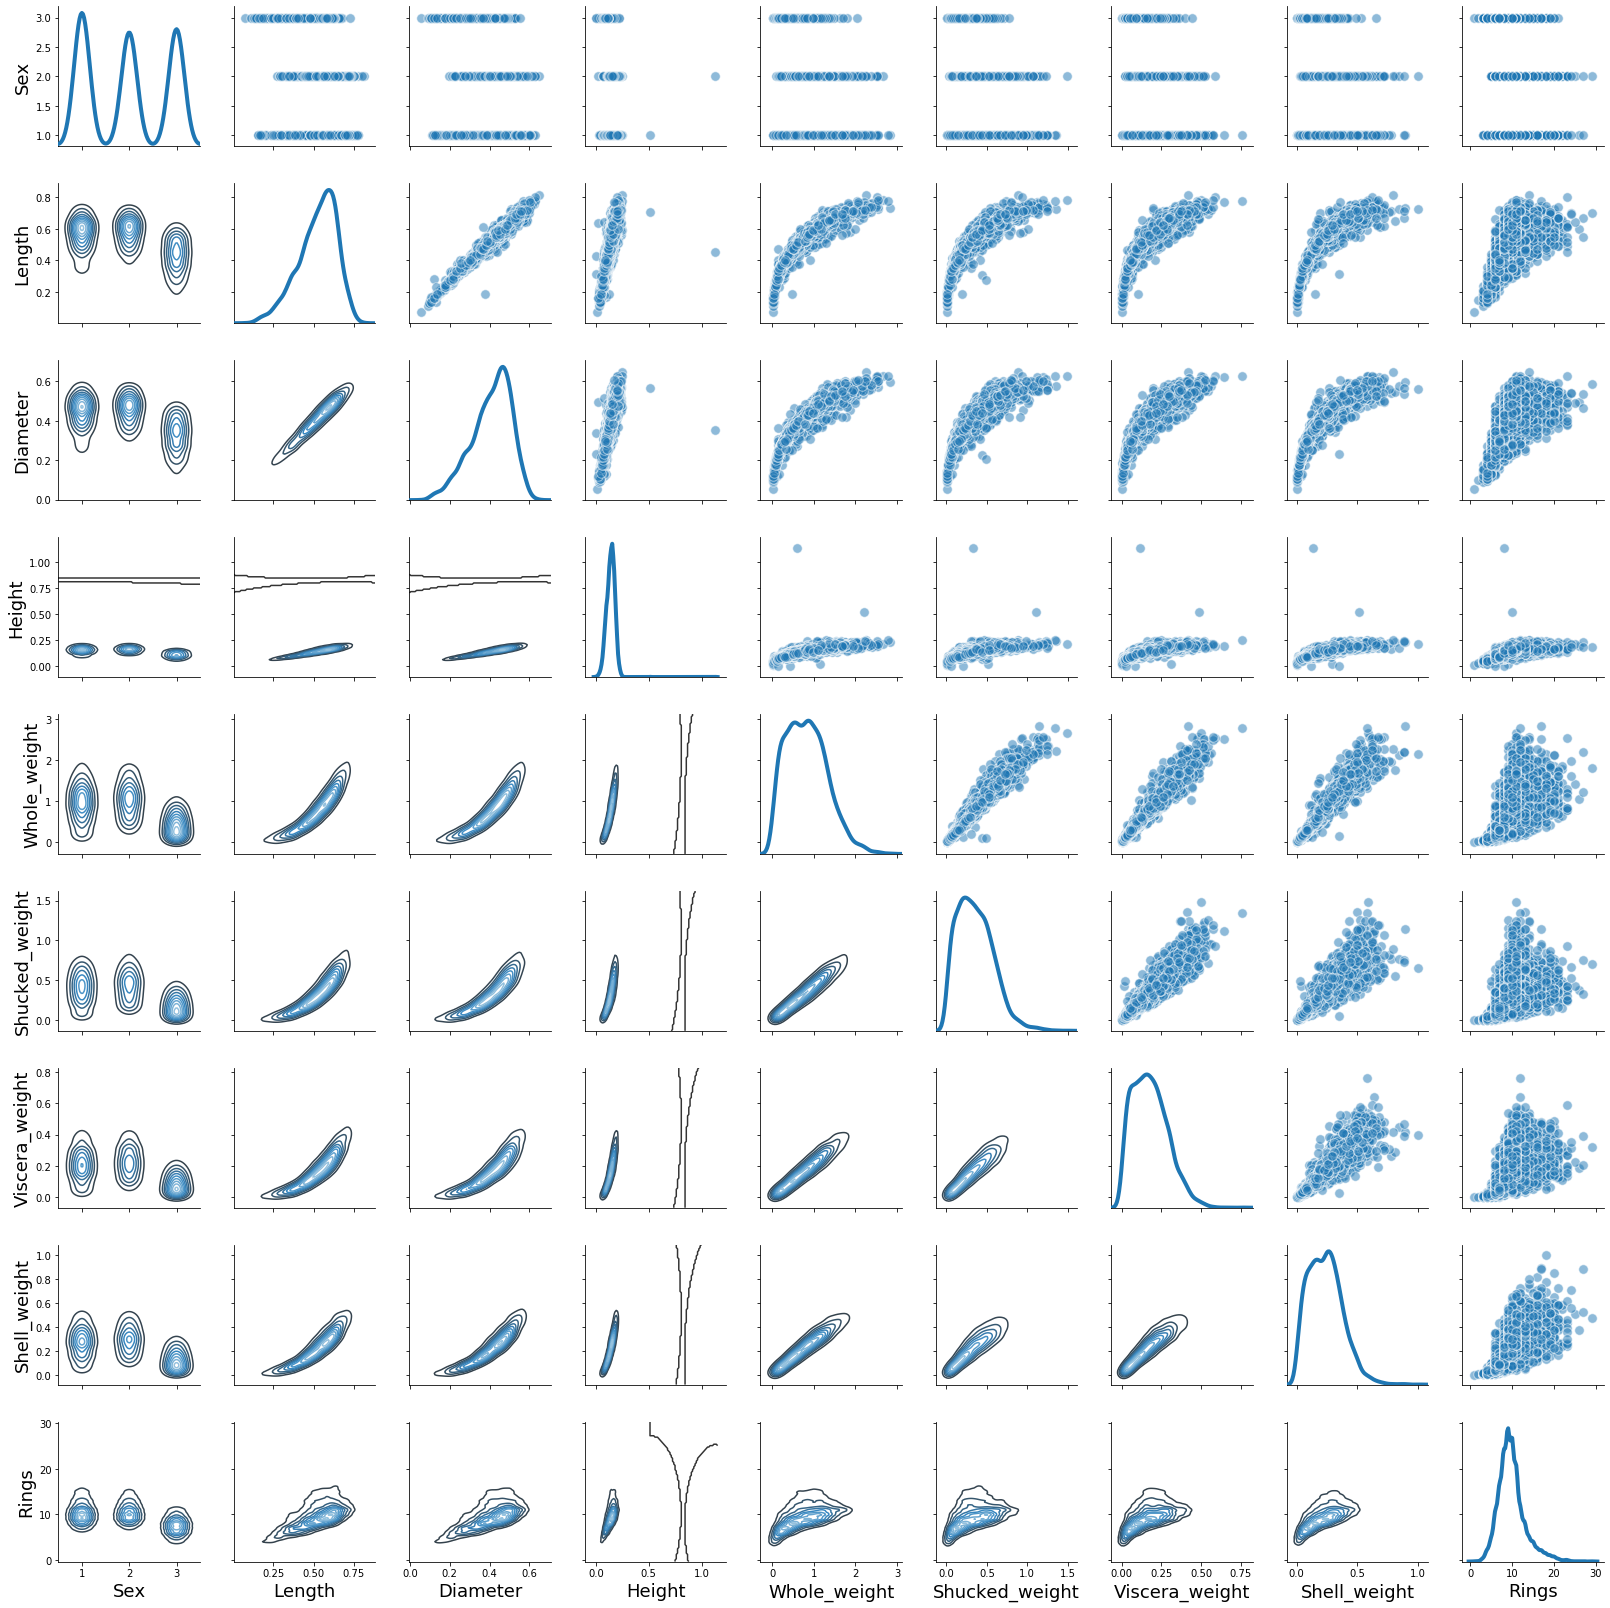

In [8]:
pyplot.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, 
            edgecolor="w", s=90, alpha=0.5)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

Adding:

- [Spearman rank correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) coefficient – a bit more robust than Pearson’s correlation coefficient
- Confidence interval for the correlation coefficient
- Probability of spurious correlation

..from [this article](https://mycarta.wordpress.com/2019/03/17/visual-data-exploration-in-python-correlation-confidence-spuriousness/).

In [9]:
import numpy as np
import scipy.stats as st

def confInt(r, nwells):
    z_crit = st.norm.ppf(.975) 
    std_Z = 1/np.sqrt(nwells-3)      
    E = z_crit*std_Z
    Z_star = 0.5*(np.log((1+r)/(1.0000000000001-r)))
    ZCI_l = Z_star - E
    ZCI_u = Z_star + E
    RCI_l = (np.exp(2*ZCI_l)-1)/(np.exp(2*ZCI_l)+1) 
    RCI_u = (np.exp(2*ZCI_u)-1)/(np.exp(2*ZCI_u)+1)
    return RCI_u, RCI_l

In [10]:
def P_spurious (r, nwells, nattributes):
    t_of_r = r * np.sqrt((nwells-2)/(1-np.power(r,2)))  
    p = st.t.sf(numpy.abs(t_of_r), nwells-2)*2 
    ks = np.arange(1, nattributes+1, 1)
    return np.sum(p * np.power(1-p, ks-1))

In [11]:
def r_crit(nwells, a):
    t = st.t.isf(a, nwells-2) 
    r_crit = t/np.sqrt((nwells-2)+ np.power(t,2))
    return r_crit

In [12]:
nwells = 21
rc = r_crit(21, 0.025)

In [13]:
from matplotlib import pyplot
%matplotlib inline

def corrfunc(x, y, rc=rc, **kws):
    r, p = st.spearmanr(x, y)
    u, l = confInt(r, 21)  
    if r > rc:
       rclr = 'g'
    else:
        rclr= 'm' 
    if p > 0.05:
       pclr = 'm'
    else:
        pclr= 'g'
    ax = pyplot.gca()
    ax.annotate("CC = {:.2f}".format(r), xy=(.1, 1.25), 
                xycoords=ax.transAxes, color = rclr, fontsize = 14)
    ax.annotate("CI = [{:.2f} {:.2f}]".format(u, l), xy=(.1, 1.1), 
                xycoords=ax.transAxes, color = rclr, fontsize = 14)
    ax.annotate("PS = {:.3f}".format(p), xy=(.1, .95), 
                xycoords=ax.transAxes, color = pclr, fontsize = 14)

Now:

- The correlation coefficient is coloured green if it is larger than the critical r, else coloured in purple
- The confidence interval is coloured green if both lower and upper are larger than the critical r, else coloured in purple
- The probability of spurious correlation is coloured in green when below 0.05 (or 5% chance)

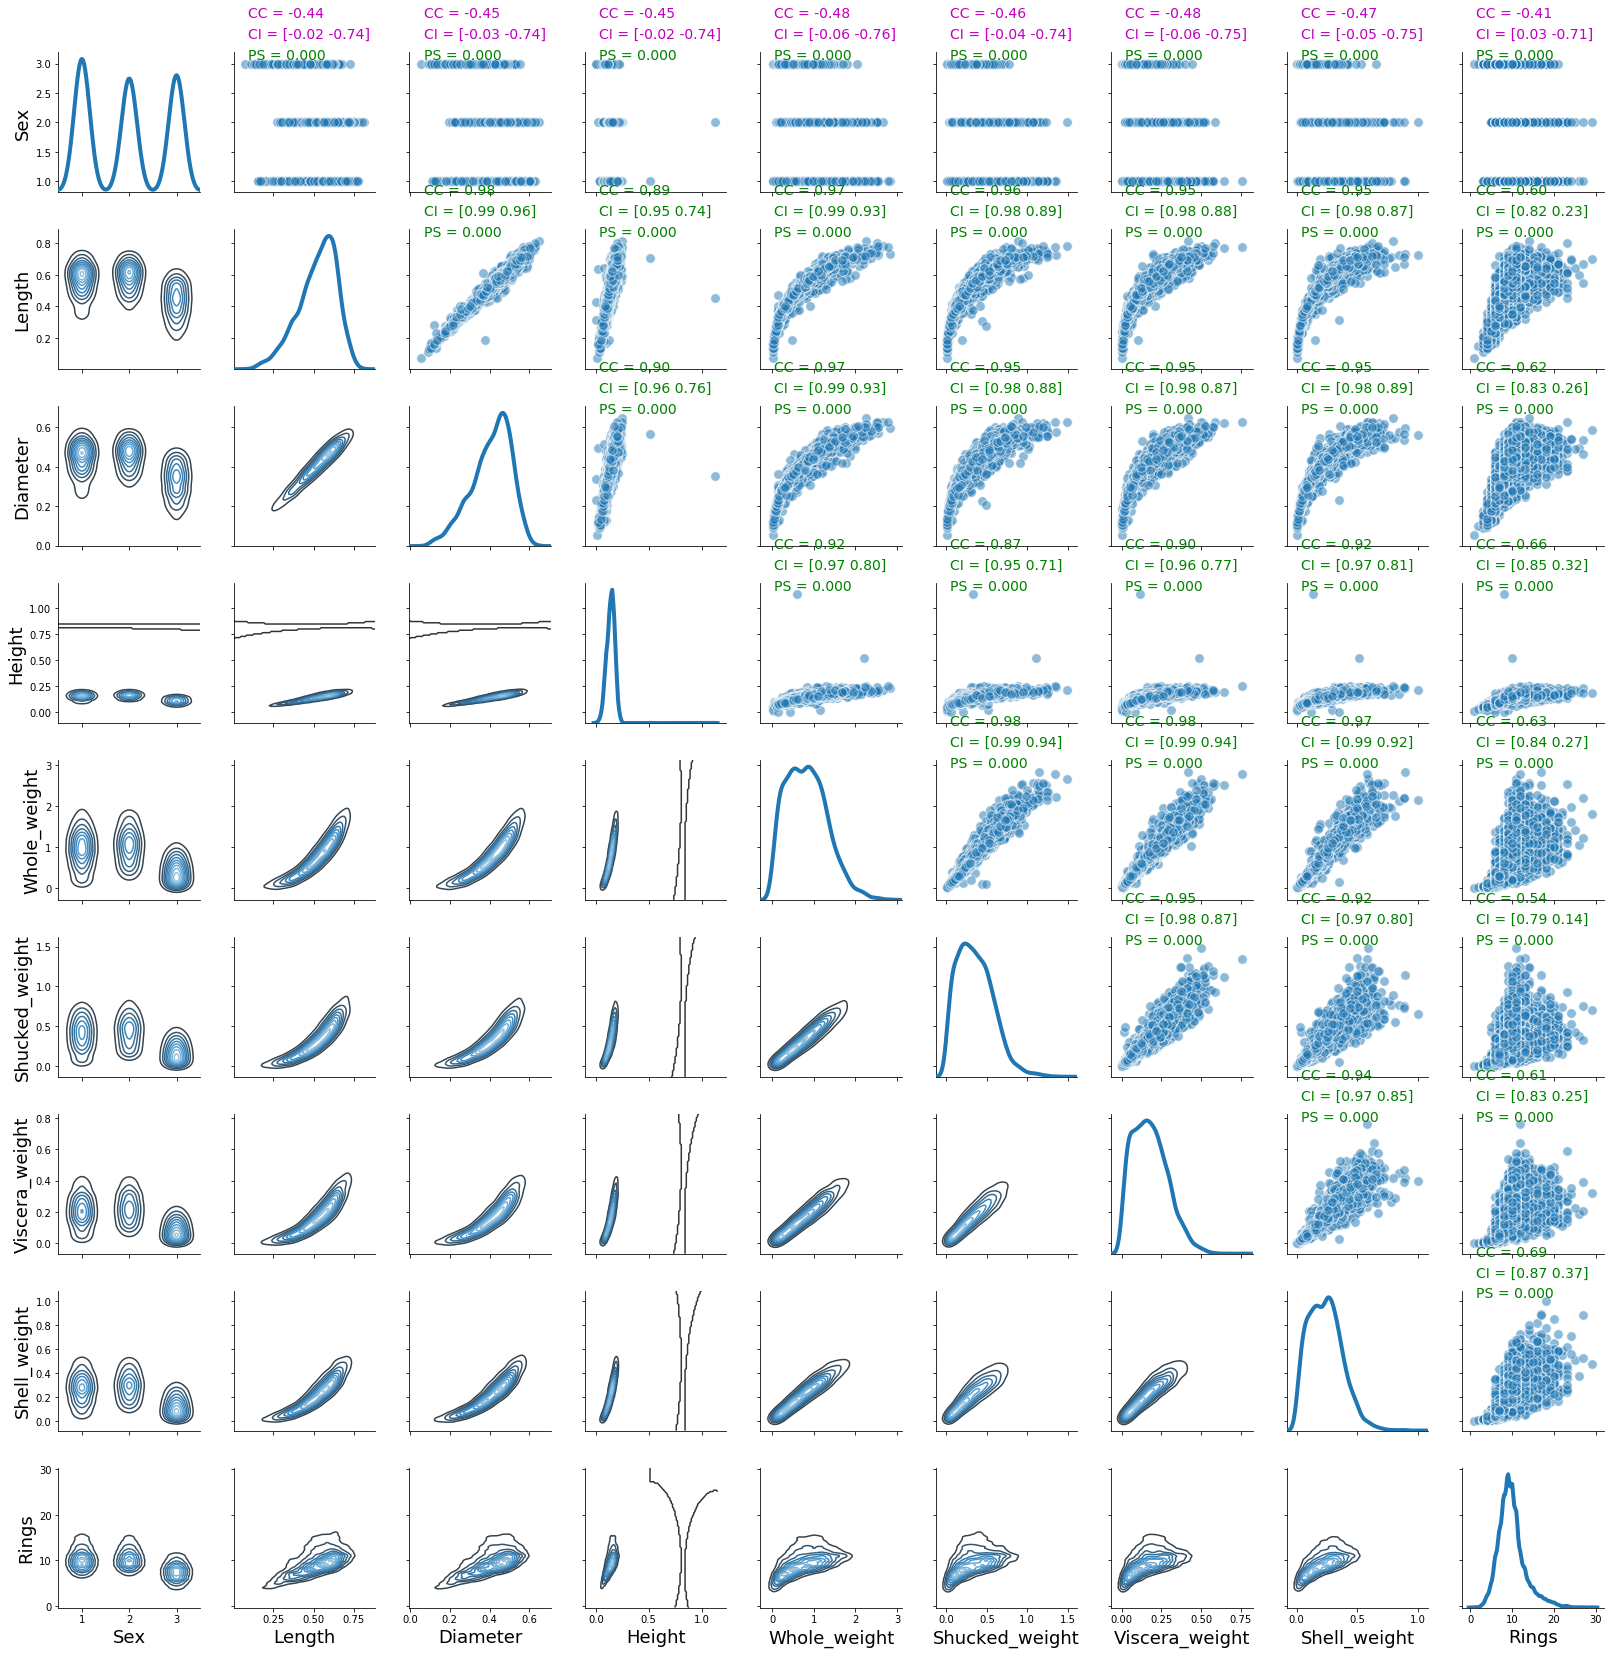

In [14]:
pyplot.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

### Distance correlation

I learned about **distance correlation** [here](https://mycarta.wordpress.com/2019/04/10/data-exploration-in-python-distance-correlation-and-variable-clustering/), and the author learned it himself at the 2018 CSEG/CASP Geoconvention talk Data science tools for petroleum exploration and production. 

Distance correlation ***does not assume a linear relationship between variables*** as does Pearson and Spearman, and even more importantly, whereas with Pearson and Spearman a correlation value of zero does not prove independence between any two variables, a ***distance correlation of zero does mean that there is no dependence between those two variables***! So in my opinion, it's more useful! [dcor](https://github.com/vnmabus/dcor) is the package, install it.
```(python)
pip install dcor
```

In [ ]:
#!pip install dcor

In [15]:
import dcor
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Rings'], 
                                                                        data['Height'])))
print("p-value = {:.7f}".format(dcor.independence.distance_covariance_test(data['Rings'], 
                                                                           data['Height'], 
                                                                           exponent=1.0, 
                                                                           num_resamples=2000)[0]))

distance correlation = 0.61
p-value = 0.0004998


import dcor
for a in data.keys():
    print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Rings'], 
                                                                        data[a])))

In [17]:
def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]
    if pval:
        return (dc, pv)
    else:
        return dc

In [18]:
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    #print("{:.4f}".format(d), "{:.4f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = pyplot.gca()
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)

KeyboardInterrupt: 

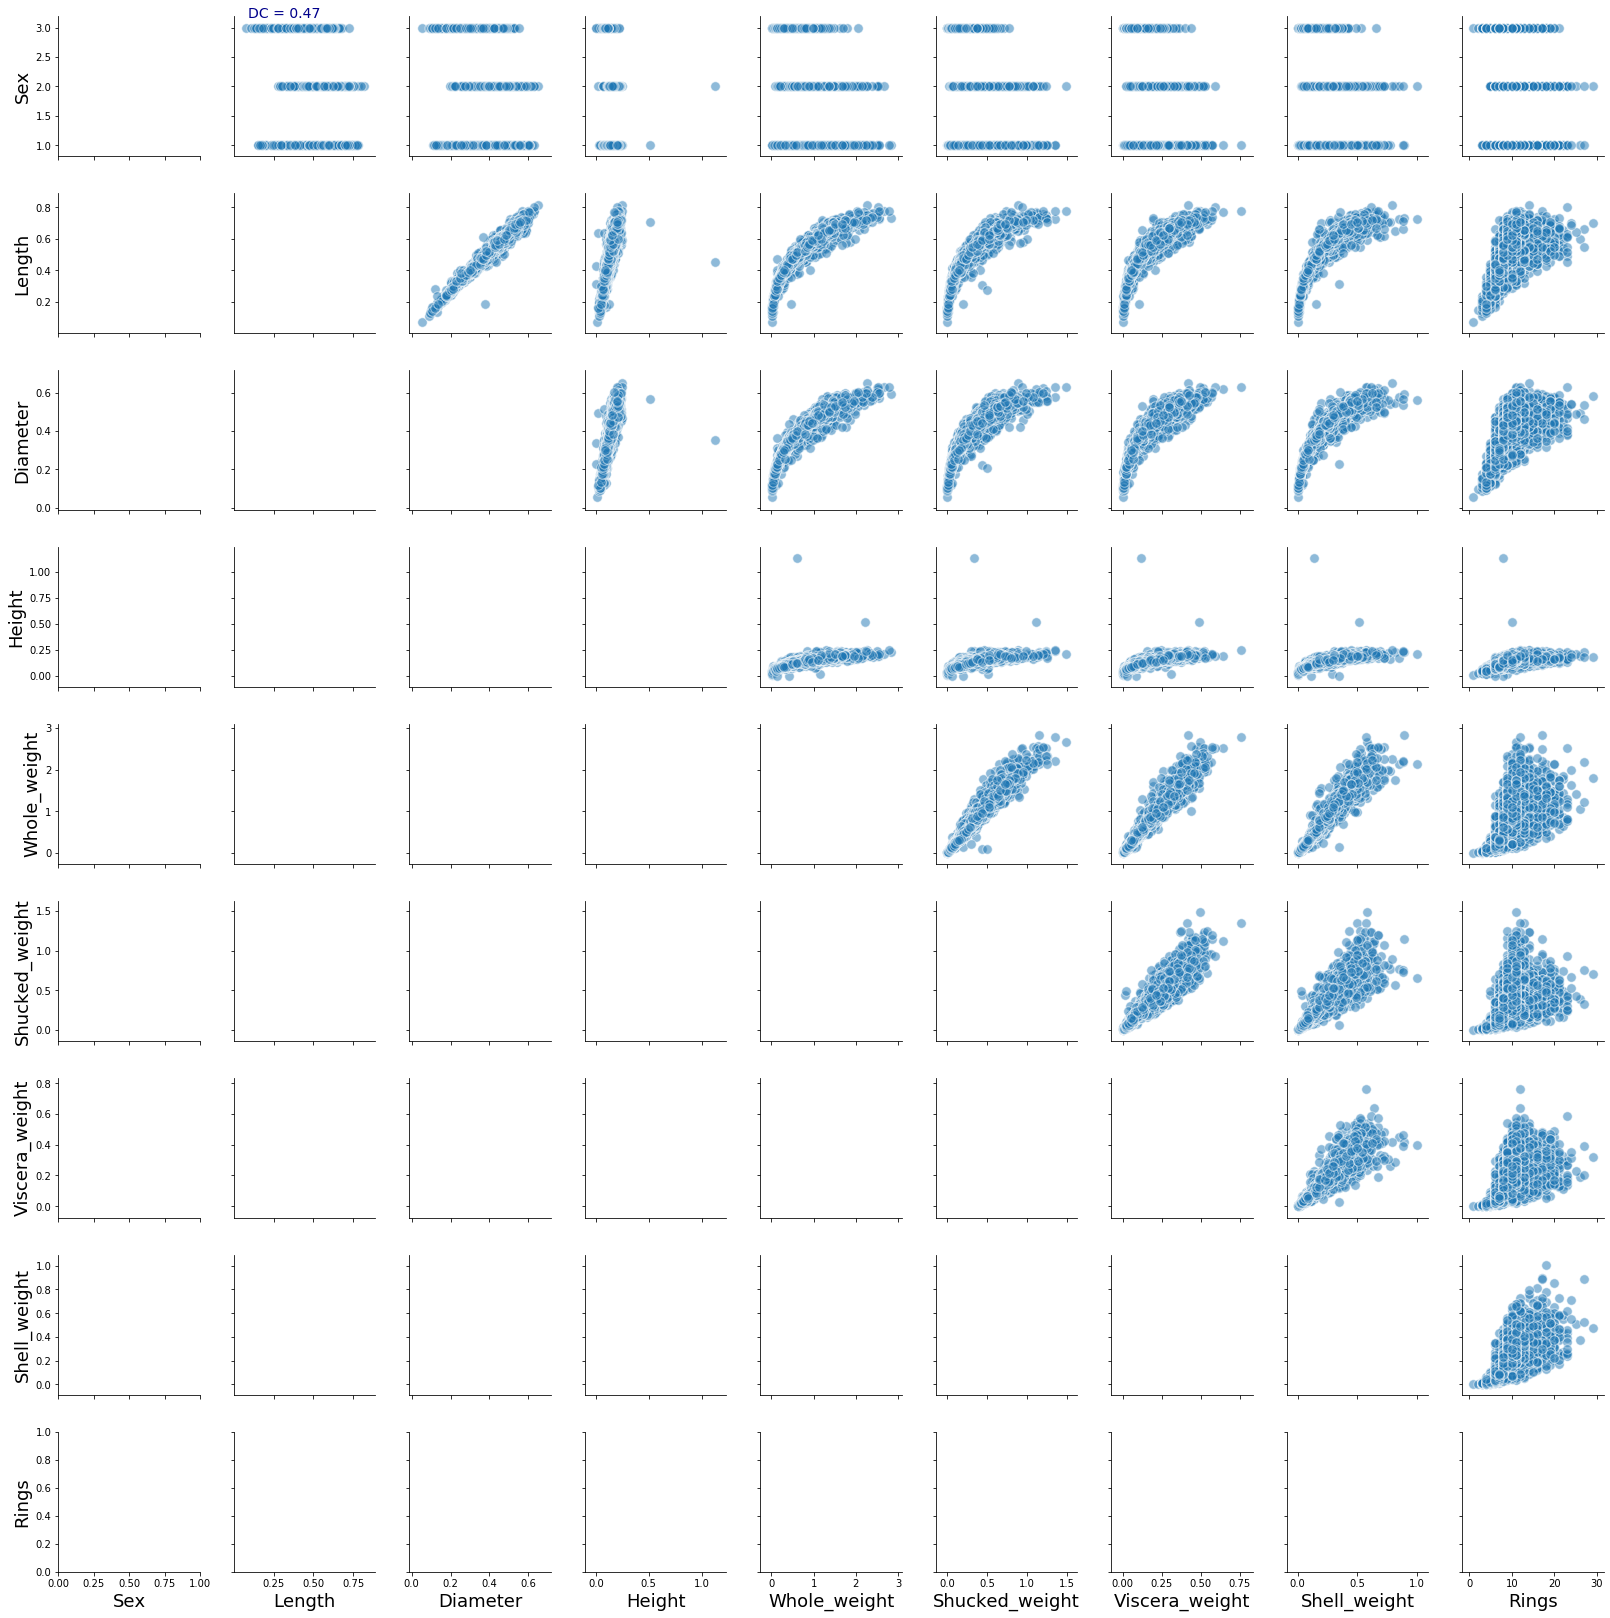

In [19]:
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show();

Then, the author creates a square matrix of distance correlation values, then looks at correlational clustering of the variables: Instead of passing raw data to the algorithm, he passes the distance correlation matrix. 

In [20]:
# Create the distance method using distance_correlation
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 

# Apply the distance method pairwise to every column
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
Sex            1.00    0.47      0.48    0.47          0.49            0.47   
Length         0.47    1.00      0.98    0.88          0.95            0.93   
Diameter       0.48    0.98      1.00    0.89          0.95            0.92   
Height         0.47    0.88      0.89    1.00          0.89            0.84   
Whole_weight   0.49    0.95      0.95    0.89          1.00            0.97   
Shucked_weight 0.47    0.93      0.92    0.84          0.97            1.00   
Viscera_weight 0.49    0.93      0.92    0.87          0.96            0.93   
Shell_weight   0.49    0.93      0.93    0.90          0.96            0.89   
Rings          0.41    0.58      0.59    0.61          0.57            0.49   

                Viscera_weight  Shell_weight  Rings  
Sex                       0.49          0.49   0.41  
Length                    0.93          0.93   0.58  
Diameter                  0.92          0.93   0.59  
Height                    0.87          0.90   0.61  
Whole_weight              0.96          0.96   0.57  
Shucked_weight            0.93          0.89   0.49  
Viscera_weight            1.00          0.92   0.56  
Shell_weight              0.92          1.00   0.63  
Rings                     0.56          0.63   1.00

Hooray, this is a very useful table!

Let’s calculate a couple of values directly, to be sure.

# Distance Correlation between the different parameters.

In [22]:
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Rings'], data['Height'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Rings'], data['Shell_weight'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Height'], data['Whole_weight'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Height'], data['Shell_weight'])))

distance correlation = 0.61
distance correlation = 0.63
distance correlation = 0.89
distance correlation = 0.90


What we expected!

Now let's use the table above as a matrix, rather than the raw data, to cluster the variables, and then display the result with a [heat-map](https://en.wikipedia.org/wiki/Heat_map) and accompanying [dendrograms](https://en.wikipedia.org/wiki/Dendrogram).

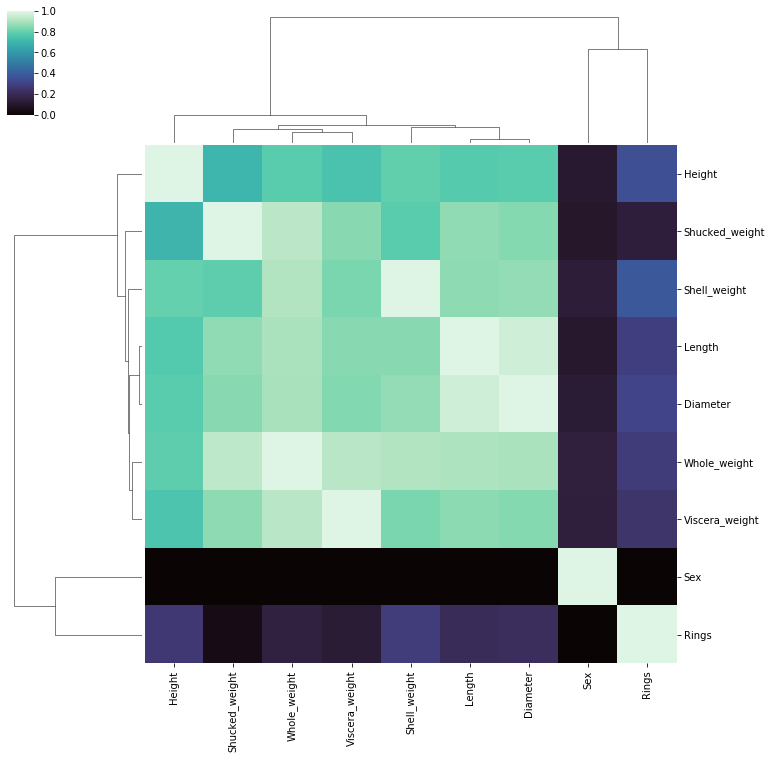

In [23]:
data.rename(index=str, inplace=True)
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

#h = heatmap.Heatmap(rslt)
#h.plot(vmin=0.0, vmax=1.1, cmap='cubehelix')
#fig = plt.gcf()
#fig.set_size_inches(22, 18)
#plt.gcf().get_axes()[1].invert_xaxis();

# heatmap
#ax = sns.heatmap(rslt, linewidth=0.5)
#fig = pyplot.gcf()
#fig.set_size_inches(12, 8)
#pyplot.gcf().get_axes()[1].invert_xaxis();
#pyplot.show()

# heatmp + dendrogram
g = sns.clustermap(rslt, cmap="mako",  standard_scale =1)
fig = pyplot.gcf()
fig.set_size_inches(12, 12);

### Correlation matrix ordered by relevant features

With distance correlation, p-value, and plots rearranged by clustering.

In [24]:
a = (g.dendrogram_col.reordered_ind)
a

[3, 5, 4, 6, 7, 1, 2, 0, 8]

 order of variables in the original DataFrame:

In [25]:
b = list(data)
b

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight',
 'Rings']

rearrange them with those reordered column indices:

In [26]:
data = data[[b[i] for i in a]]
list(data)

['Height',
 'Shucked_weight',
 'Whole_weight',
 'Viscera_weight',
 'Shell_weight',
 'Length',
 'Diameter',
 'Sex',
 'Rings']

KeyboardInterrupt: 

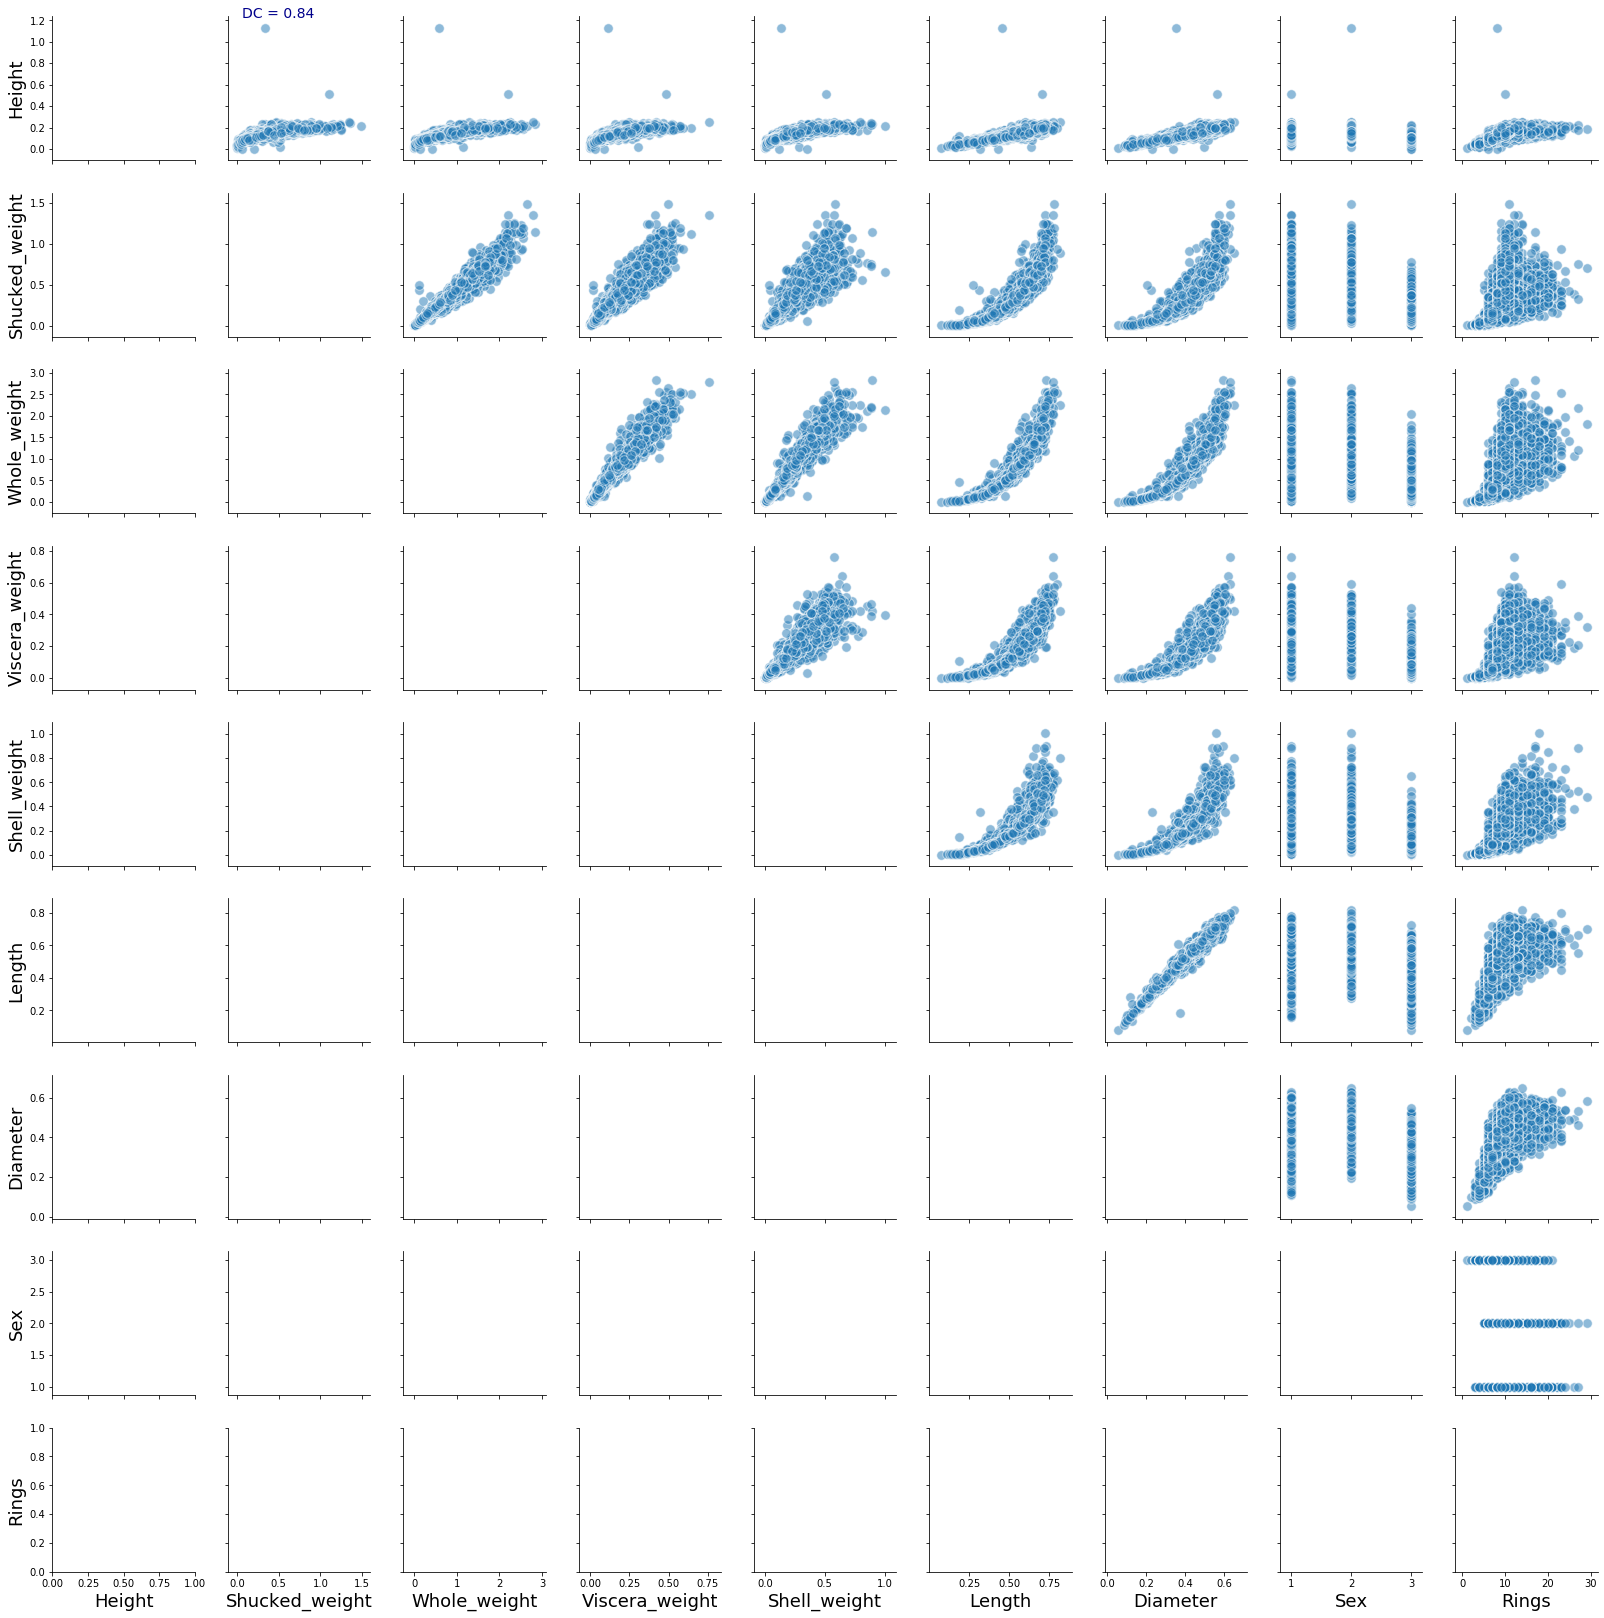

In [27]:
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

# \#2: Multivariate distributions

So far we've only been looking at observations with a single feature. We call these **univariate**.

Let's branch off to multiple variables, or **mutli-variate data**. 

Initially we will assume that they are **independently normal distributed**. That is, each feature is normally distributed on its own, and there is no correlation between them.  This will allow us to evaluate how traditional anomaly detection performs on realistic data, because realistic data is seldom univariate. 

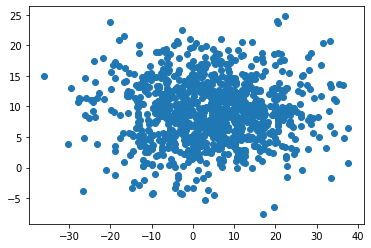

In [30]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000
X1 = np.random.normal(4, 12, N)
X2 = np.random.normal(9, 5, N)
plt.scatter(X1, X2)
plt.show()

In [31]:
x1_sample_mean = X1.mean()
x2_sample_mean = X2.mean()
x1_sample_sigma = X1.std()
x2_sample_sigma = X2.std()
print('Sample Mean 1:', x1_sample_mean)
print('Sample Mean 2:', x2_sample_mean)
print('Sample Standard Deviation 1:', x1_sample_sigma)
print('Sample Standard Deviation 2:', x2_sample_sigma)

Sample Mean 1: 4.173127888017445
Sample Mean 2: 9.175382675363753
Sample Standard Deviation 1: 12.298732389958253
Sample Standard Deviation 2: 5.139346983498688


Let's look at a heatmap of where we would expect to find observations given the 2D hisotgram implied by these distributions.

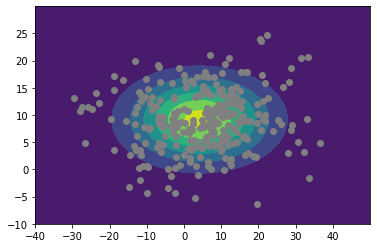

In [32]:
from scipy.stats import multivariate_normal

delta = 0.025
x1 = np.arange(-40, 50, delta)
x2 = np.arange(-10, 30, delta)
x, y = np.meshgrid(x1, x2)

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv = multivariate_normal([x1_sample_mean, x2_sample_mean], [[x1_sample_sigma**2, 0.], [0., x2_sample_sigma**2]])
plt.contourf(x, y, rv.pdf(pos))

thinned_points = np.array([n in np.random.choice(N, 300) for n in range(N)])
plt.scatter(X1[thinned_points], X2[thinned_points], c='gray')

Because the two variables are independent and uncorrelated, we get nice concentric circles (ellipses, really) for our 2D histogram.

Our histogram allows us to artifically generate data that looks like our empirical data.

As we move in towards the means (towards bright areas), we're increasingly likely to draw an observation that matches our empirical dataset. As we move away from the means (towards dark areas), we're less likely to generate a point that matches our dataset. We might decide that anything in the black region is **anomalous**.

Note that because the distribution of the x2 has a ***smaller variance***, the area of high probability is much thinner vertically than it is horizontally: our histogram is ***squished*** in the vertical dimension.

### Correlated Multivariate data

What if our two datasets x1 and x2 are **correlated**, for example the way domain names and URL lengths are correlated:

Let's build a 2D dataset where the two random variables are correlated.

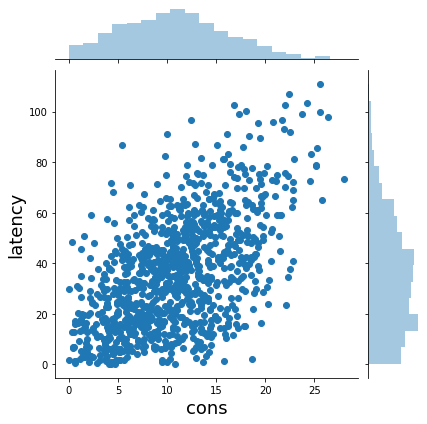

In [33]:
def positive_support_normal(mean, sigma, n):
    xs = np.random.normal(mean, sigma, n)
    for i, num in enumerate(xs):
        while num < 0:
            num = np.random.normal(mean[i], sigma)
        xs[i] = num
    return xs
    
N = 1000

mu_cons = 10
sigma_cons = 6
sigma_latency = 20
beta = 3

cons = positive_support_normal(np.array([mu_cons]*N), sigma_cons, N)
latency = positive_support_normal(beta * cons, sigma_latency, N)
ax = sns.jointplot('cons', 'latency', pd.DataFrame({'cons': cons, 'latency': latency}))

If we use our previous uncorrelated histogram, we're clearly not going to match our data, as our data is **skewed** in the diagonal, towards the origin.

We can capture the correlation between x1 and x2 by filling in the values of the correlation matrix. But the problem is, we don't know what these values are!

Let's try a few different values.

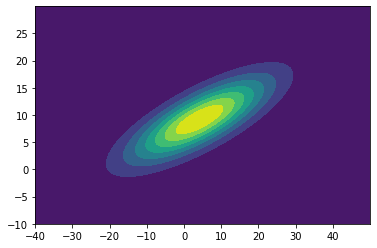

In [34]:
delta = 0.025
x1 = np.arange(-40, 50, delta)
x2 = np.arange(-10, 30, delta)
x, y = np.meshgrid(x1, x2)

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

x1_x2_corr_sigma = 7

rv = multivariate_normal([x1_sample_mean, x2_sample_mean], 
                         [[x1_sample_sigma**2, x1_x2_corr_sigma**2], [x1_x2_corr_sigma**2, x2_sample_sigma**2]])
plt.contourf(x, y, rv.pdf(pos))

## 6. Multivariate Gaussian distribution in 3D

The plot below shows us in 3D, the independent multivariate gaussian distribution we introduced above.

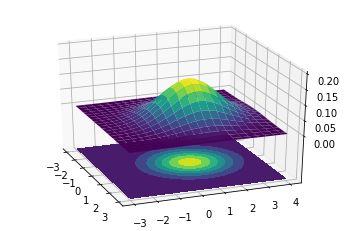

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 0], [0,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

- Since SciPy 0.14, there has been a multivariate_normal function in the scipy.stats subpackage which can also be used to obtain the multivariate Gaussian probability distribution function:

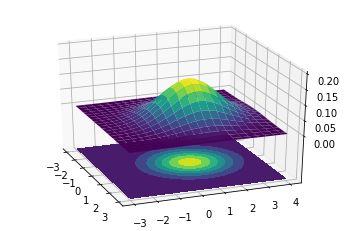

In [36]:
from scipy.stats import multivariate_normal
F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

Now, let's introduce some correlation between X & Y:

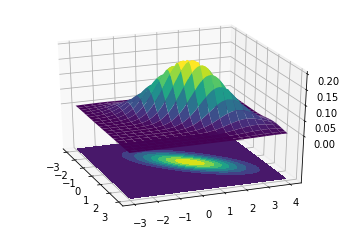

In [37]:
Sigma = np.array([[ 1. , 0.9], [0.9,  1.5]])

F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

In [38]:
Sigma = np.array([[ 1. , -0.9], [-0.9,  1.5]])

F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

Do you see how we get a non-isotropic pattern, indicating correlation between X & Y?

### GP definition

A **Univariate** Gaussian is a distributions over real valued variables.

A **Multivariate** Gaussian is a tuple (e.g. pairs for 2 random variables, triplets for 3 random variables, etc.) of real valued variables.

A **Gaussian Process** is not a countable sequence anymore! It's a **function** of (infinite numbers of) real
valued variables.



[-0.03180657 -0.1257808   0.64265738  0.97515726  0.25326737]
B = [[ 1.048576e+02 -3.276800e+01  1.024000e+01 -3.200000e+00  1.000000e+00]
 [ 5.062500e+00 -3.375000e+00  2.250000e+00 -1.500000e+00  1.000000e+00]
 [ 8.100000e-03  2.700000e-02  9.000000e-02  3.000000e-01  1.000000e+00]
 [ 2.401000e-01  3.430000e-01  4.900000e-01  7.000000e-01  1.000000e+00]
 [ 3.906250e+01  1.562500e+01  6.250000e+00  2.500000e+00  1.000000e+00]] 
p = [-0.03180657 -0.1257808   0.64265738  0.97515726  0.25326737]
p(x) = -0.03180657205425007x^4 + -0.12578079528543923 x^3 + 0.642657379886482 x^2 + 0.97515726018048 x + 0.253267372462419 is the unique cubic polynomial that interpolates these points.


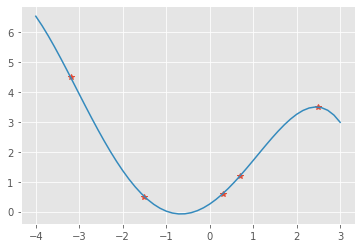

In [39]:
%matplotlib inline
import numpy
from matplotlib import pyplot
pyplot.style.use('ggplot')

# our x-axis and our vandermonde degree 3 matrix
x = numpy.linspace(-4, 3)
A = numpy.array([x**4, x**3, x**2, x, 1+0*x]).T

# freeze 5 observations that our functions needs to go through
x1 = numpy.array([-3.2, -1.5, 0.3, 0.7, 2.5])    # points where we know values
y = numpy.array([ 4.5,  0.5, 0.6, 1.2, 3.5])     # values at those points

pyplot.plot(x1, y, '*')
B = numpy.vander(x1)                     # Vandermonde matrix at the known points
p = numpy.linalg.solve(B, y)             # Compute the polynomial coefficients
print(p)
pyplot.plot(x, A.dot(p))                 # Plot the polynomial evaluated at all points
print('B =', B, '\np =', p)
print('p(x) = ' + str(p[0]) + 'x^4 + ' + 
                  str(p[1]) + ' x^3 + ' + 
                  str(p[2]) + ' x^2 + ' + 
                  str(p[3]) + ' x + ' + 
                  str(p[4]) + ' is the unique cubic polynomial that interpolates these points.')

There may be a single quartic polynomial that passes through these points, but there is a countably infinite nunmber of functions that pass through these 5 points when we consider ***all possible functions***, including polynomials higher than quartic, exponentials, gaussians, Poissons, Gammas, etc.

# 2.Scikit-Learn-Modelling-for-Abalone-Data Using the DecisionTree and Random Forest Machine Learnng Algorithms

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [43]:
data = pd.read_csv("data/abalone.csv")
print("Number of samples: %d" % len(data))
data.head()

Number of samples: 4177


Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0    1    0.46      0.36    0.10          0.51            0.22   
1    1    0.35      0.27    0.09          0.23            0.10   
2    2    0.53      0.42    0.14          0.68            0.26   
3    1    0.44      0.36    0.12          0.52            0.22   
4    3    0.33      0.26    0.08          0.20            0.09   

   Viscera_weight  Shell_weight  Rings  
0            0.10          0.15     15  
1            0.05          0.07      7  
2            0.14          0.21      9  
3            0.11          0.15     10  
4            0.04          0.06      7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C52A819BE0>,
      dtype=object)

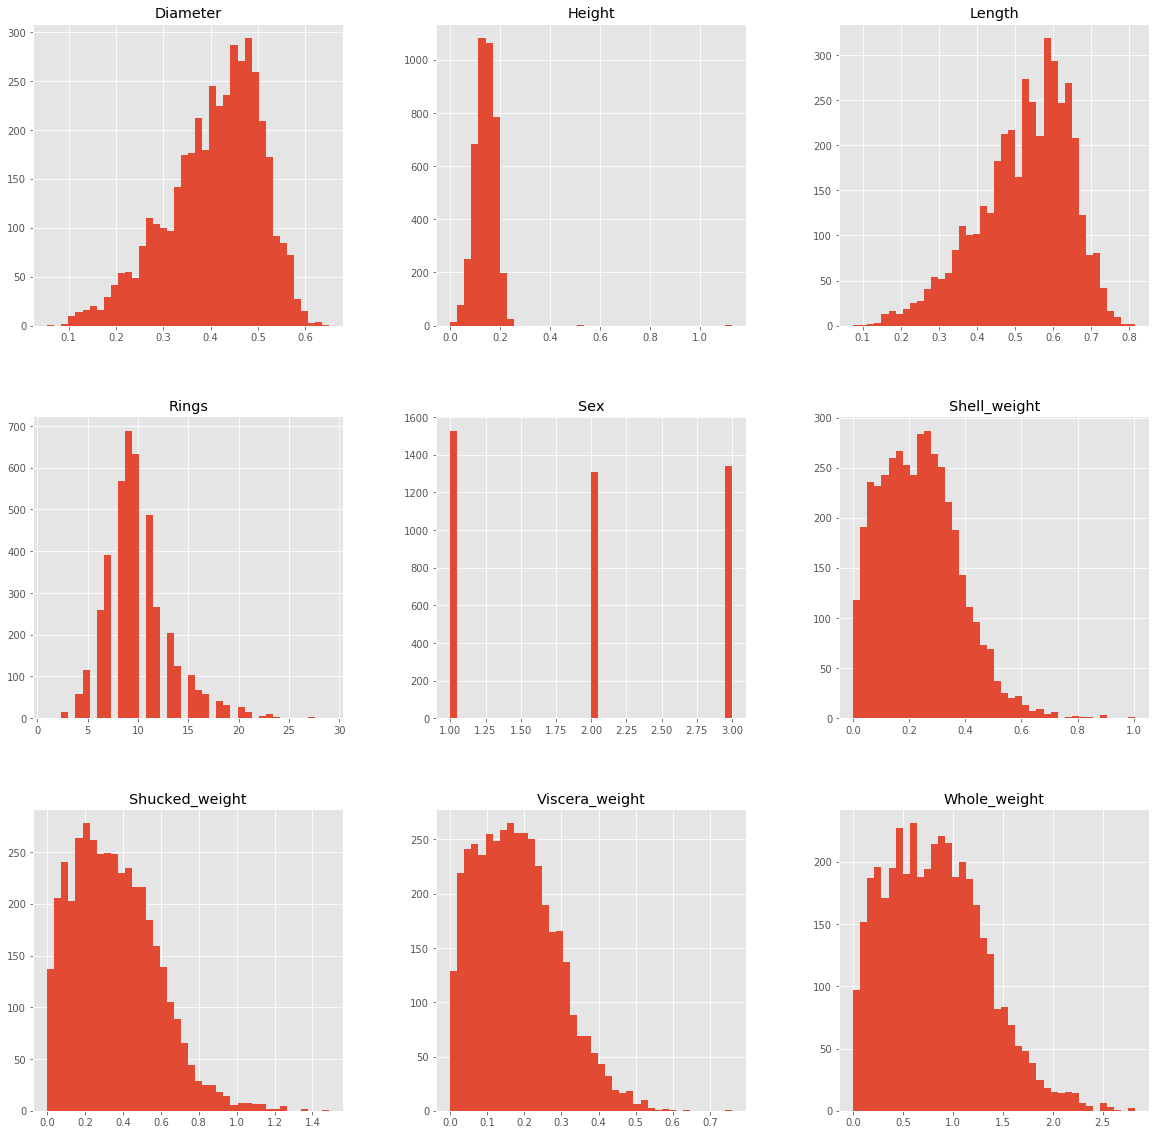

In [44]:
data.hist(figsize=(20, 20), bins=40)

Sex is either Male ("M"), Female ("F") or Infant ("I"), this is not suitable for regression algorithms, so we create a binary/boolean feature for each of the 3 options:


In [45]:
# for more complicated cases use sklearn.feature_extraction.DictVectorizer
for label in "MFI":
    data[label] = data["Sex"] == label
del data["Sex"]


C:\Users\JAINHEMANT\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [46]:
data.head()

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0    0.46      0.36    0.10          0.51            0.22            0.10   
1    0.35      0.27    0.09          0.23            0.10            0.05   
2    0.53      0.42    0.14          0.68            0.26            0.14   
3    0.44      0.36    0.12          0.52            0.22            0.11   
4    0.33      0.26    0.08          0.20            0.09            0.04   

   Shell_weight  Rings      M      F      I  
0          0.15     15  False  False  False  
1          0.07      7  False  False  False  
2          0.21      9  False  False  False  
3          0.15     10  False  False  False  
4          0.06      7  False  False  False

Data in sklearn are structured as:
a 2D numpy array (n_samples, n_features), where each column is a feature (e.g. sex and physical dimensions) for each sample, e.g. each measured Abalone.
a 1D numpy array (n_samples) of the value we aim to predict, e.g. the number of rings, standard variable name y


In [47]:
y = data.Rings.values

In [48]:
len(y)

4177

Remove rings from data, so we can convert all the dataframe to a numpy 2D array.

In [49]:
del data["Rings"] # remove rings from data, so we can convert all the dataframe to a numpy 2D array.
X = data.values.astype(np.float)


In [50]:
len(X)

4177

Split data in Training and Test sets
We can split the data into training and validation sets and use Machine Learning to create an estimator that can learn from the training set and then check its performance on the test set.


In [51]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation
train_X, test_X, train_y, test_y = train_test_split(X, y) # splits 75%/25% by default

# Fit a Decision Tree to the data


A Decision Tree learns from available data the best conditions to set on the features, e.g. the purpose and the programming language, to predict an output value, e.g. what format should be used.
The DecisionTreeRegressor is a similar algorithm used to estimate a continous variable instead of a discrete one:


In [52]:
from sklearn.tree import DecisionTreeRegressor
# create an estimator, optionally specifying parameters
model = DecisionTreeRegressor()
# fit the estimator to the data
model.fit(train_X, train_y)
# apply the model to the test and training data
predicted_test_y = model.predict(test_X)
predicted_train_y = model.predict(train_X)


We can visualize the results with a scatter-plot of the true number of rings against the predicted number of rings:


In [53]:
def scatter_y(true_y, predicted_y):
    """Scatter-plot the predicted vs true number of rings
    
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (true_y - predicted_y).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
    
    return rms


In [54]:
scatter_y(train_y, predicted_train_y)
plt.title("Training data")
scatter_y(test_y, predicted_test_y)
plt.title("Test data");


The Decision Tree overfits the training set, i.e. its parameters are fine tuned to reproduce the results of the training set but generalized badly to data not seen previously.
To prevent this issue we specify a maximum depth of the decision tree of 
10,so that the estimator does not "specialize" too much on the training data.


In [55]:
model = DecisionTreeRegressor(max_depth=10)
# fit the estimator to the data
model.fit(train_X, train_y)
# apply the model to the test and train data
predicted_test_y = model.predict(test_X)
predicted_train_y = model.predict(train_X)


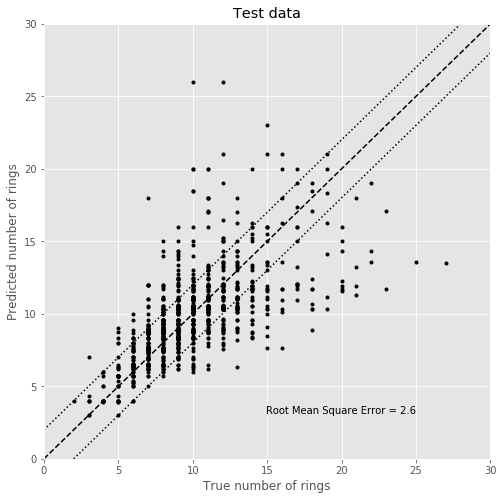

In [56]:
scatter_y(train_y, predicted_train_y)
plt.title("Training data")
rms_decision_tree = scatter_y(test_y, predicted_test_y)
plt.title("Test data");


# Plot learning curves


In [57]:
data_percentage_array = np.linspace(10, 100, 10)


In [58]:
train_error = []
test_error = []
for data_percentage in data_percentage_array:
    model = DecisionTreeRegressor(max_depth=10)
    number_of_samples = int(data_percentage / 100. * len(train_y))
    model.fit(train_X[:number_of_samples,:], train_y[:number_of_samples])

    predicted_train_y = model.predict(train_X)
    predicted_test_y = model.predict(test_X)

    train_error.append((predicted_train_y - train_y).std())
    test_error.append((predicted_test_y - test_y).std())


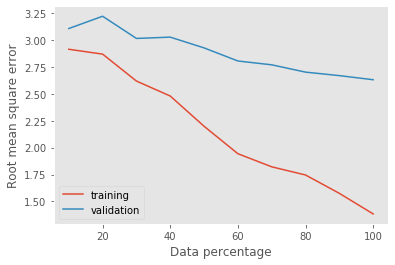

In [59]:
plt.plot(data_percentage_array, train_error, label='training')
plt.plot(data_percentage_array, test_error, label='validation')
plt.grid()
plt.legend(loc=3)
plt.xlabel('Data percentage')
plt.ylabel('Root mean square error');


Inspecting the learning curve, we see that the training error decreases as the DecisionTree fits better the data, but the validation error shows a significant gap compared to training error. That typically means the model is not fitting the data well.


# Fit a Random Forest estimator to the data


In this case it is useful to test a more sophisticated model, for example Random Forests, i.e. a method that trains several Decision Trees and averages them.
sklearn has a very consistent interface, for any estimator, call fit for training then predict to estimate.


In [60]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=5)
model.fit(train_X, train_y)
predicted_test_y = model.predict(test_X)
rms_random_forest = scatter_y(test_y, predicted_test_y)


In [61]:
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_decision_tree, rms_random_forest))


Root Mean Square error decreases from 2.6 to 2.3.



# Optimize model parameters


However we have not yet performed any optimization of the Random Forest parameters:
max_depth: the maximum depth of the Decision Trees
max_features: the max number of features to consider for each split
Given a list (or distributions) of parameters, RandomizedSearchCV performs a randomized search (less expensive than an exhaustive grid search) for the best parameters.
RandomizedSearchCV uses cross validation, i.e. randomly splits the input data in order to estimate the performance of each model more robustly.


In [62]:
model = RandomForestRegressor(n_estimators=100)


In [63]:
n_features = X.shape[1]


In [64]:
#from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import learning_curve, GridSearchCV,RandomizedSearchCV
#from sklearn.grid_search import RandomizedSearchCV
grid = RandomizedSearchCV(model, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, y)
print(grid.best_params_)


C:\Users\JAINHEMANT\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_features': 3, 'max_depth': 9}


In [65]:
model = RandomForestRegressor(max_features=grid.best_params_["max_features"],
                              max_depth=grid.best_params_["max_depth"])
model.fit(train_X, train_y)


C:\Users\JAINHEMANT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [82]:
predicted_test_y = model.predict(test_X)

model.score(test_X, test_y)



array([ 5.87294477, 11.56060546,  7.40560731, ..., 11.88955369,
        9.38319174,  3.79666667])

In [83]:
predicted_test_y

array([ 5.87294477, 11.56060546,  7.40560731, ..., 11.88955369,
        9.38319174,  3.79666667])

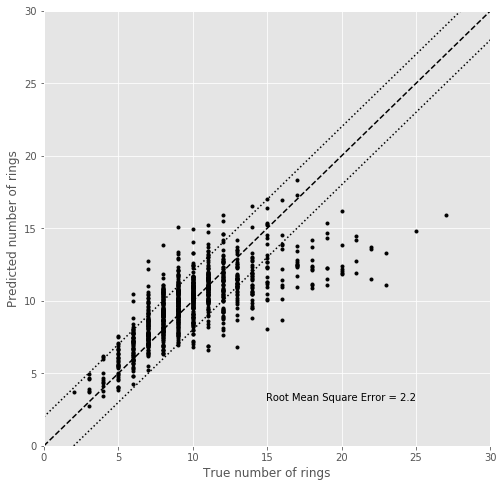

In [67]:
rms_optimized_random_forest = scatter_y(test_y, predicted_test_y)

In [68]:
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_random_forest, rms_optimized_random_forest))


Root Mean Square error decreases from 2.3 to 2.2.


# Summary fo the Scikit-learn ML Modelling

In this notebook we learnt about:

Prepare y vector of outputs and X matrix of features for sklearn

Split train and test sets: cross_validation.train_test_split(X, y)

Train an estimator: model.fit(train_X, train_y)

Use a trained estimator to predict unknown output values: model.predict(test_X)

Use RandomizedSearchCV to optimize model parameters


# 3.Using GaussianProcess from the Scikit-learn package in python

In [69]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

In [70]:
a=X.reshape(10,4177)[0]
a.shape

(4177,)

In [71]:
b = X.reshape(10,4177)[0].reshape(-1, 1)
b.shape

(4177, 1)

In [72]:
y.shape

(4177,)

In [73]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(b, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [74]:
gp.kernel_

9.88**2 + Matern(length_scale=4.91, nu=1.5) + WhiteKernel(noise_level=10.4)

In [81]:
x_pred = np.linspace(-6, 6).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)
y_pred

array([10.12849481, 10.14338916, 10.15850162, 10.17375051, 10.1890376 ,
       10.2042459 , 10.21923697, 10.23384809, 10.24788893, 10.26113798,
       10.27333839, 10.28419347, 10.29336152, 10.30045021, 10.30501018,
       10.30652793, 10.30441796, 10.29801393, 10.28655881, 10.26919404,
       10.24494728, 10.21271892, 10.17126703, 10.11919065, 10.05491116,
        9.97668617,  9.88987886,  9.80677778,  9.73412291,  9.67381116,
        9.62562425,  9.58738685,  9.5575862 ,  9.53462209,  9.51725221,
        9.50475709,  9.49643853,  9.49168437,  9.48996202,  9.4908026 ,
        9.49379404,  9.49857489,  9.50482878,  9.51227941,  9.5206861 ,
        9.52983982,  9.53955953,  9.54968906,  9.56009417,  9.57066003])

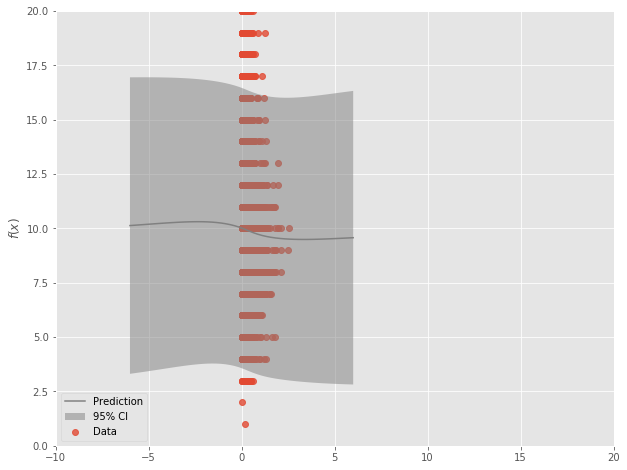

In [76]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
sns.regplot(b, y, fit_reg=False, label='Data')
plt.plot(x_pred, y_pred, color='grey', label='Prediction')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.ylabel('$f(x)$')
plt.xlim(-10, 20)
plt.ylim(0, 20)
plt.legend(loc='lower left');

In [ ]:
X = X.reshape(-1, 1)
X.shape

In [ ]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(train_X, train_y)

In [ ]:
#x_pred = np.linspace(-6, 6).reshape(-1,1)

y_pred, sigma = gp.predict(test_X, return_std=True)
rms_optimized_gaussianprocess = scatter_y(test_y, y_pred)


#predicted_test_y = model.predict(test_X)

In [ ]:
a=X.reshape(10,4177)[0]
a.shape

In [ ]:
y.shape

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.regplot(a, y, fit_reg=False, label='Data')
plt.plot(test_X, y_pred, color='grey', label='Prediction')
plt.fill(np.concatenate([test_X, test_X[::-1]]),
         np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(-2,5)
plt.ylim(-5, 30)
plt.legend(loc='lower left');

In [ ]:
#X.reshape(10,4177)[0]

x_pred1 = np.linspace(-6, 6).reshape(-1,1)
y_pred1, sigma1 = gp.predict(x_pred1, return_std=True)

# Overall Comparison Conclusion for the above three modelling:

# Pendinng to add the final conclusions

We have tried to predict the number of Rings around abalone using the various columns namely as 'Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight'
using the three different methods:
The results we got from all the three methods and the corresponding graphs are summarized below to have a conclusion which model is better across three.
Also,comparing the RMSE value helps to find the method having the minimum error rate.

# Distance Correlation Method

In [90]:
#RMSE Value from Distance Correlation Method

import dcor
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Rings'], 
                                                                        data['Height'])))
print("p-value = {:.7f}".format(dcor.independence.distance_covariance_test(data['Rings'], 
                                                                           data['Height'], 
                                                                           exponent=1.0, 
                                                                           num_resamples=2000)[0]))





Distance correlation = 0.61
p-value = 0.0004998

# Predicted Number of Rings from Random Forest Regression

In [87]:

predicted_test_y

array([ 5.87294477, 11.56060546,  7.40560731, ..., 11.88955369,
        9.38319174,  3.79666667])

# Predicted Number of Rings using the Gaussian Process:

In [84]:
#RMSE Value from the Gaussian Process from the Scikit-learn
#print("Root Mean Square error decreases from %.2g" % (y_pred))


y_pred

array([10.12849481, 10.14338916, 10.15850162, 10.17375051, 10.1890376 ,
       10.2042459 , 10.21923697, 10.23384809, 10.24788893, 10.26113798,
       10.27333839, 10.28419347, 10.29336152, 10.30045021, 10.30501018,
       10.30652793, 10.30441796, 10.29801393, 10.28655881, 10.26919404,
       10.24494728, 10.21271892, 10.17126703, 10.11919065, 10.05491116,
        9.97668617,  9.88987886,  9.80677778,  9.73412291,  9.67381116,
        9.62562425,  9.58738685,  9.5575862 ,  9.53462209,  9.51725221,
        9.50475709,  9.49643853,  9.49168437,  9.48996202,  9.4908026 ,
        9.49379404,  9.49857489,  9.50482878,  9.51227941,  9.5206861 ,
        9.52983982,  9.53955953,  9.54968906,  9.56009417,  9.57066003])

# Bonus Question: GPs with PyMC3

We do tried to run this code using the 16GB RAM laptop but the kernel was getting crashed.So,were unable to complete the process.
We do also tried to run the notebook on the Google Colab environment but still we were facing the same issue,Don't know why?

For the reference I am attaching the screenshots we have taken while running the jupyter notebook on the Google Colab.


<br />
<center>
<img src="data/IMG_20191105_194840.jpg" width=400 />
</center>

In [ ]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as gp_fit:

    ρ = pm.Gamma('ρ', 1, 1)
    η = pm.Gamma('η', 1, 1)
    
    K = η * pm.gp.cov.Matern32(1, ρ)

In [ ]:
with gp_fit:
    
    M = pm.gp.mean.Zero()
    σ = pm.HalfCauchy('σ', 2.5)

In [ ]:
with gp_fit:

    gp = pm.gp.Marginal(mean_func=M, cov_func=K)

# The marginal likelihood:

In [ ]:
with gp_fit:
    
    y_obs = gp.marginal_likelihood('y_obs', X=X, y=y, noise=σ)

In [ ]:
with gp_fit:
    #trace =pm.sample(2000,n_init=500)
    trace = pm.sample(500, n_init=100,cores=1,chains=2)

In [ ]:
pm.traceplot(trace[-1000:], varnames=['ρ', 'σ', 'η']);

In [ ]:
pm.plot_posterior(trace[-1000:], varnames=['ρ', 'σ', 'η'])

In [ ]:
ρm = trace[-1000:]['ρ'].mean()
ρm 

In [ ]:
σm = trace[-1000:]['σ'].mean()
σm 

In [ ]:
ηm = trace[-1000:]['η'].mean()
ηm 

In [ ]:
mm = [ρm, σm, ηm]

In [ ]:
pd.DataFrame({"Parameter": ['ρ', 'σ', 'η'],
              "best approximation": [ρm, σm, ηm]})

In [ ]:
with gp_fit:
    mp = pm.find_MAP()

In [ ]:
mp

In [ ]:
# "mp" stands for marginal posterior
pd.DataFrame({"Parameter": ['ρ', 'σ', 'η'],
              "Value at MAP": [float(mp["ρ"]), float(mp["σ"]), float(mp["η"])]})

In [ ]:
Z = np.linspace(-6, 6, 100).reshape(-1, 1)

with gp_fit:

    y_pred = gp.conditional("y_pred", Xnew=Z, pred_noise=True)

In [ ]:
# To use the point estimate hyperparameter values, replace the trace with a length-1 list with `mm`
with gp_fit:
    y_samples = pm.sample_ppc([mp], vars=[y_pred], samples=500)

In [ ]:
y_samples["y_pred"]

In [ ]:
Plot predictions:

In [ ]:
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# posterior predictive distribution
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, y_samples["y_pred"], Z, plot_samples=False, palette="bone_r");

# overlay a scatter of one draw of random points from the posterior predictive distribution
plt.plot(Z, y_samples["y_pred"][200, :].T, "co", ms=2, label="Predicted data");

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
#plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-3,3]);
plt.title("posterior predictive distribution"); plt.legend();